In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time

In [49]:
def getSoup(link):
    r = requests.get(link)
    r.encoding = 'UTF-8'
    return BeautifulSoup(r.text,'html.parser')

link="https://en.wikipedia.org/wiki/FTSE_100_Index"
soup = getSoup(link)
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>FTSE 100 Index - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"32035fdf-ff47-4c5f-be13-a70e1e71aa46","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"FTSE_100_Index","wgTitle":"FTSE 100 Index","wgCurRevisionId":989050793,"wgRevisionId":989050793,"wgArticleId":497717,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","All articles with dead external links","Articles with dead external links from December 2016","Articles with permanently dead exte

In [55]:
right_table=soup.find('table',{'id':'constituents'})
type(right_table)

bs4.element.Tag

In [56]:
rows = right_table.findAll("tr")
len(rows)

101

In [57]:
for row in right_table.findAll("tr"):
    cells = row.findAll('td')

len(cells)

3

In [58]:
header = [th.text.rstrip() for th in rows[0].find_all('th')]
print(header)

['Company', 'EPIC', 'FTSE Industry Classification Benchmark sector[12]']
------------
3


In [64]:
lst_data = []
for row in rows[1:]:
            data = [d.text.rstrip() for d in row.find_all('td')]
            lst_data.append(data)
df = pd.DataFrame(lst_data)
df.columns = header
df

#code very much inspired by https://github.com/Sateesh110/Rep_Medium/blob/master/A1_WikiTables_Scraping/A1_WikiTable_WorldPopulation.ipynb

,Company,EPIC,FTSE Industry Classification Benchmark sector[12]
0,3i,III,Financial Services
1,Admiral Group,ADM,Nonlife Insurance
2,Anglo American plc,AAL,Mining
3,Antofagasta,ANTO,Mining
4,Ashtead Group,AHT,Support Services
...,...,...,...
95,Unilever,ULVR,Personal Goods
96,United Utilities,UU.,"Gas, Water & Multi-utilities"
97,Vodafone Group,VOD,Mobile Telecommunications
98,Whitbread,WTB,Retail hospitality


In [80]:
my_headers = {'cuni' : '77332679'}
response = requests.post('https://ies-midterm.soulution.rocks/login', json=my_headers)
print(response)
r = response.json()
r.keys()


<Response [200]>


dict_keys(['data', 'message'])

In [81]:
d=pd.DataFrame()
for data in r[data][dataset_ids]:
    while True:
        try:
            p = requests.get('https://ies-midterm.soulution.rocks/data/{}'.format(data))
            pdf = pd.DataFrame(p.json())
            d.append(pdf)
        except:
            continue
                             
d

TypeError: unhashable type: 'list'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000148E10A7D88>],
      dtype=object)

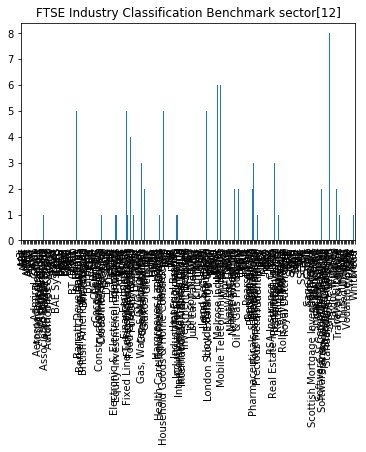

In [71]:
df.apply(pd.value_counts)['FTSE Industry Classification Benchmark sector[12]'].plot(kind='bar', subplots=True)